In [2]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

## 알고리즘 체인과 파이프 라인

- train_test_split에 의하여 분할된 훈련 데이터 전체를 MinMaxScaler에 Fit을 함

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# load and split the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# compute minimum and maximum on the training data
scaler = MinMaxScaler().fit(X_train)

In [5]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# learn an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scale the test data and score the scaled data
X_test_scaled = scaler.transform(X_test)
print("Test score: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test score: 0.95


### 6.1 데이터 전처리와 매개변수 선택

- Scale이 적용된 훈련 데이터 전체를 GridSearchCV의 fit에 넣어줌
  - GridSearchCV에서 자동으로 다시 훈련 데이터와 검증 데이터를 분리
  - **검증 데이터는 Scale을 위한 fit에 활용되면 안되기 때문**에 아래 코드는 문제가 있음

In [6]:
from sklearn.model_selection import GridSearchCV

# for illustration purposes only, don't use this code!
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

X_test_scaled = scaler.transform(X_test)
print("Test set accuracy: {:.2f}".format(grid.score(X_test_scaled, y_test)))

Best cross-validation accuracy: 0.98
Best parameters:  {'C': 1, 'gamma': 1}
Test set accuracy: 0.97


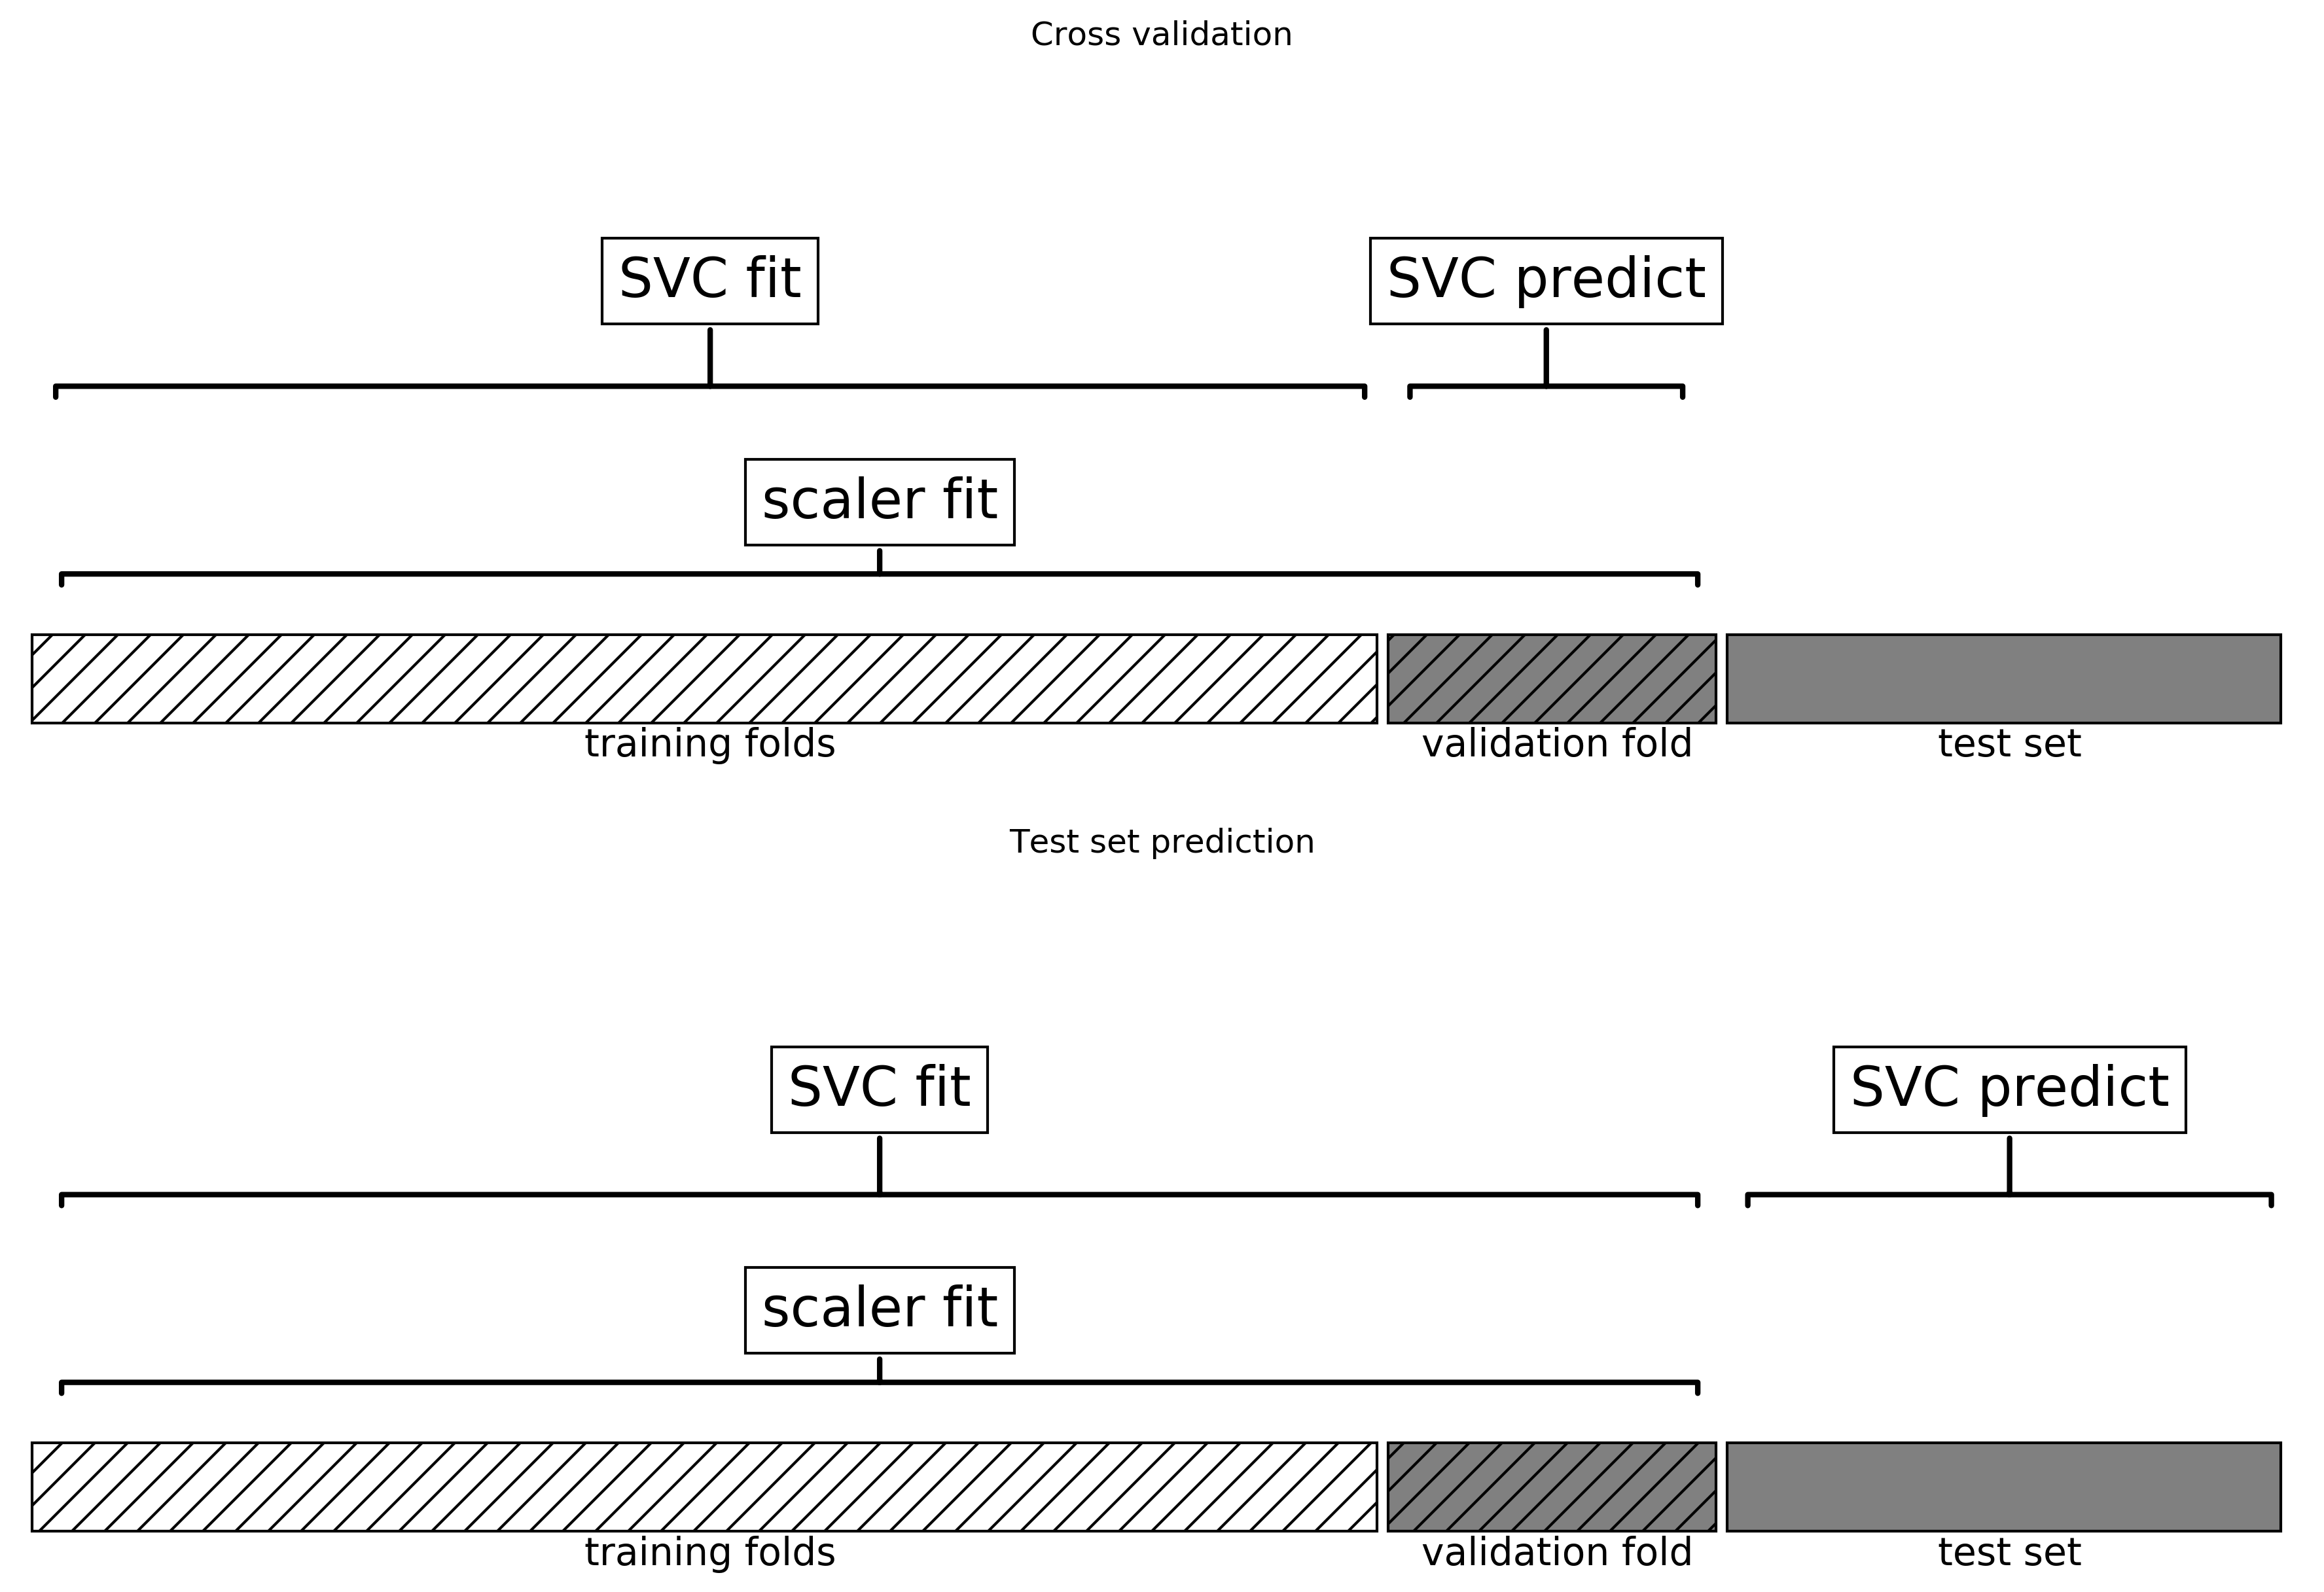

In [7]:
mglearn.plots.plot_improper_processing()

- 위 그림의 첫번째 경우의 문제점
  - 검증 데이터의 정보가 Scale을 통한 데이터 변환시에 이미 노출이 됨. 